<a href="https://colab.research.google.com/github/shofydidntsleep/AIML-Hub/blob/main/Mobile_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library Python**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Import Data**

In [ ]:
df = pd.read_csv("train.csv")

**Preprocessing Data**

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Menghitung Frekuensi Relatif Kelas**

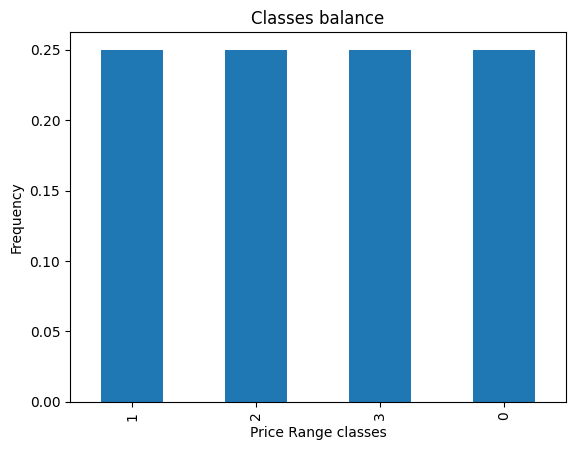

In [ ]:
df['price_range'].value_counts(normalize= True).plot(kind = 'bar')
plt.xlabel("Price Range classes")
plt.ylabel("Frequency")
plt.title("Classes balance");

 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

**Melihat korelasi kolom "Ram & Battery Power" di kolom "Price Range".**

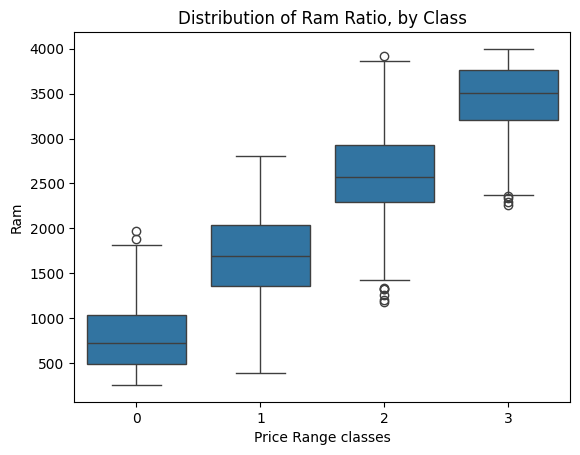

In [ ]:
sns.boxplot(x='price_range' , y='ram' , data=df)
plt.xlabel("Price Range classes")
plt.ylabel("Ram")
plt.title("Distribution of Ram Ratio, by Class");

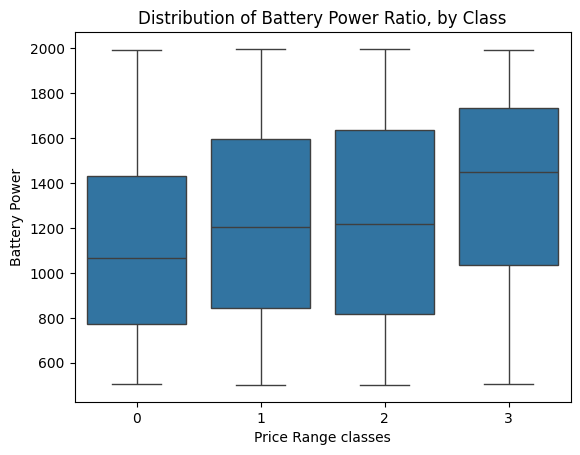

In [ ]:
sns.boxplot(x='price_range' , y='battery_power' , data=df)
plt.xlabel("Price Range classes")
plt.ylabel("Battery Power")
plt.title("Distribution of Battery Power Ratio, by Class");

**Pemodelan Data Menggunakan Random Forest**

Matrix Konfusi:
 [[146   5   0   0]
 [ 11 109  15   0]
 [  0  25 113  13]
 [  0   0  12 151]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       151
           1       0.78      0.81      0.80       135
           2       0.81      0.75      0.78       151
           3       0.92      0.93      0.92       163

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



<ipython-input-10-c111f4973e8f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


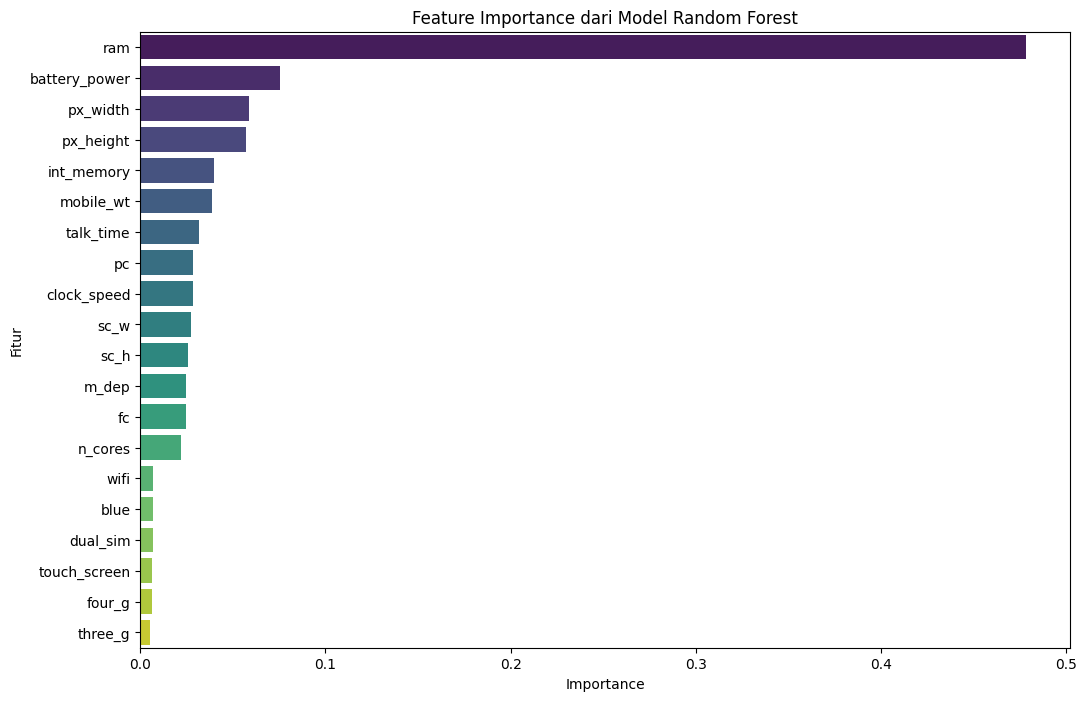

In [ ]:
# Pisahkan variabel target dan variabel independen
X = df.drop('price_range', axis=1)
y = df['price_range']

# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Pelatihan model
model.fit(X_train, y_train)

# Prediksi kelas harga pada set pengujian
y_pred = model.predict(X_test)

# Evaluasi kinerja model
print("Matrix Konfusi:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Visualisasi feature importance
feature_importance = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance dari Model Random Forest')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

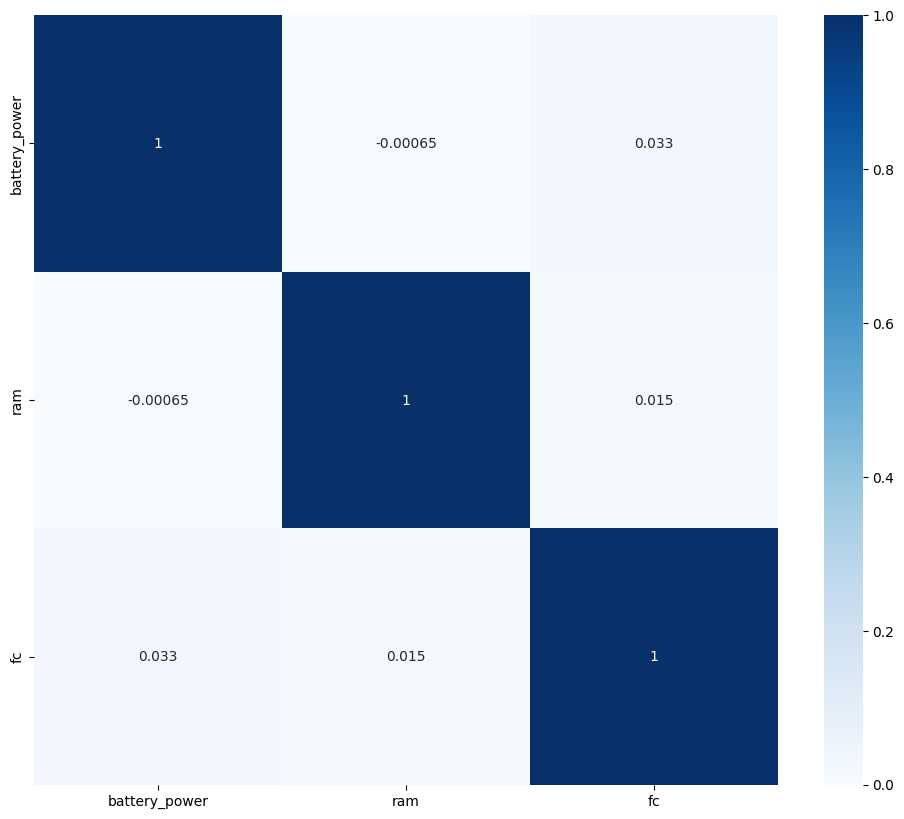

In [ ]:
selected_columns = df[["battery_power", "ram", "fc"]]
# Menghitung matriks korelasi
corr_matrix = selected_columns.corr(method="pearson")

# Plot matriks korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.show()

**Implementasi Model Regresi Multiple Linear**

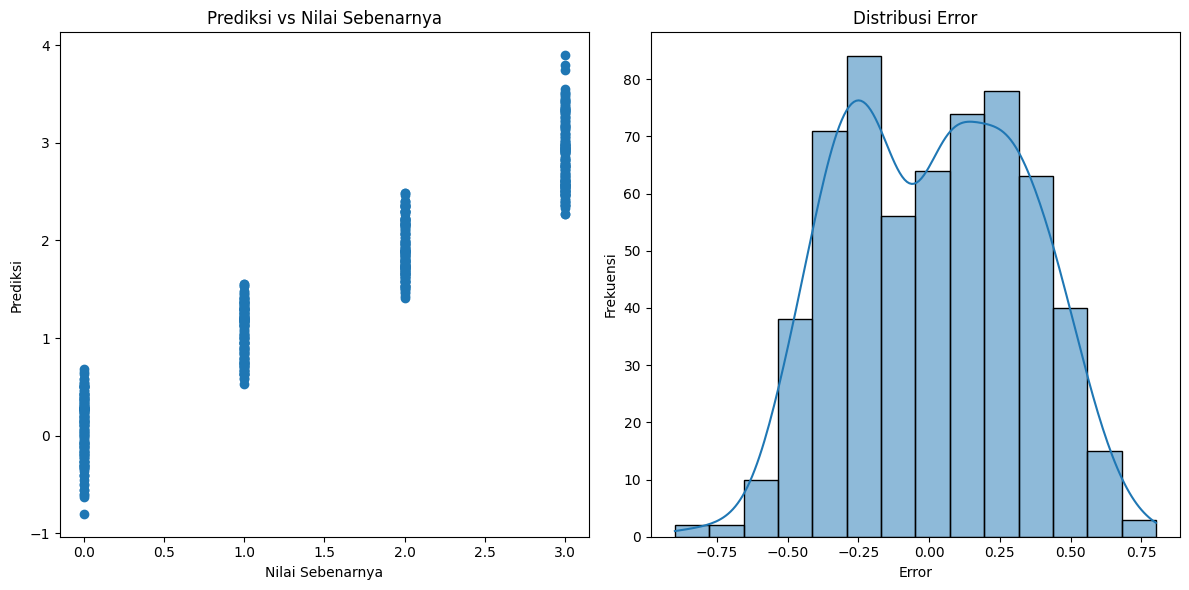

Mean Squared Error (MSE): 0.10148186876893099
R-squared (R2): 0.921622845515753


In [ ]:
# Pisahkan variabel target dan variabel independen
X = df.drop('price_range', axis=1)
y = df['price_range']

# Bagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Inisialisasi dan pelatihan model regresi linear berganda
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dengan set pengujian
y_pred = model.predict(X_test)

# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Visualisasi prediksi vs nilai sebenarnya pada set pengujian
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.title('Prediksi vs Nilai Sebenarnya')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')

# Visualisasi residu (selisih antara nilai sebenarnya dan prediksi)
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribusi Error')
plt.xlabel('Error')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Laporan kinerja model
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

**Kesimpulan**:

* Model regresi linear yang telah dibangun memberikan prediksi harga yang sangat baik berdasarkan fitur-fitur yang digunakan.
* Mean Squared Error yang rendah menunjukkan tingkat kesalahan prediksi yang rendah, artinya model secara akurat memperkirakan harga untuk sebagian besar data pengujian.
* R-squared yang tinggi (92.16%) menunjukkan bahwa model cukup baik dalam menjelaskan variasi harga, sehingga dapat dianggap sebagai model yang cocok untuk dataset ini.
* Model ini dapat menjadi pilihan yang baik untuk prediksi harga perangkat
mobile berdasarkan fitur-fitur yang telah digunakan dalam model.